#  Understanding Problem Statement

Happy Customer Bank wants to automate the Credit Card Lead Prediction process (real time) based on customer detail provided .

The Bank wants to cross sell its credit cards to its existing customers.

To automate this process, the bank is looking help in identifying customers  that could show higher intent towards a recommended credit card.

The following dataset contains (245725, 11) attributes.


# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv("D:/Desktop/train_s3TEQDk.csv")
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
df.shape

(245725, 11)

# Preprocessing the dataset

In [6]:
# find the null values
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [7]:
 29325/245725 #11% MISSING VALUE IN CREDIT PRODUCT , NEED TO BE TAKEN CARE


0.11934072642181301

In [8]:
# filling a null values using fillna() # replaced it with no information, 

df["Credit_Product"].fillna("No info", inplace = True) 
  

In [9]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [10]:
#df.drop('ID',
 # axis='columns', inplace=True)

# Exploratory Data Analysis

In [11]:
# List value_counts on all columns
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(100))

----------------------------------------ID---------------------------------------- - 

97XFLO8W    1
KNJPMTS2    1
7EJH6YZB    1
DLHAS3KG    1
3KYXHJNY    1
           ..
ZFNYWV7S    1
J9SGYRP6    1
KIXEFEU8    1
F5MCNUUJ    1
OHRP2OXG    1
Name: ID, Length: 100, dtype: int64

----------------------------------------Gender---------------------------------------- - 

Male      134197
Female    111528
Name: Gender, dtype: int64

----------------------------------------Age---------------------------------------- - 

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64

----------------------------------------Region_Code---------------------------------------- - 

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

----------------------------------------Occupation---------------------------------------- - 

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

----------------------------------------Channel_Code---------------------------------------- - 

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

----------------------------------------Vintage---------------------------------------- - 

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

----------------------------------------Credit_Product---------------------------------------- - 

No         144357
Yes         72043
No info     29325
Name: Credit_Product, dtype: int64

----------------------------------------Avg_Account_Balance---------------------------------------- - 

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
2519785     10
1324150     10
1308273     10
1170207     10
714518      10
Name: Avg_Account_Balance, Length: 100, dtype: int64

----------------------------------------Is_Active---------------------------------------- - 

No     150290
Yes     95435
Name: Is_Active, dtype: int64

----------------------------------------Is_Lead---------------------------------------- - 

0    187437
1     58288
Name: Is_Lead, dtype: int64

# Visualizing Categorical Column

<AxesSubplot:xlabel='Gender', ylabel='count'>

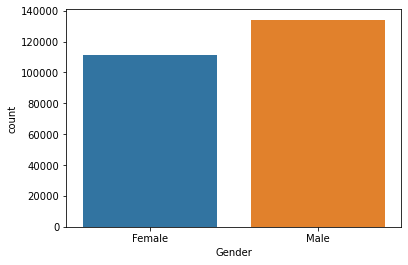

In [12]:
#gender 
# categorical attributes visualization
sns.countplot(df['Gender'])

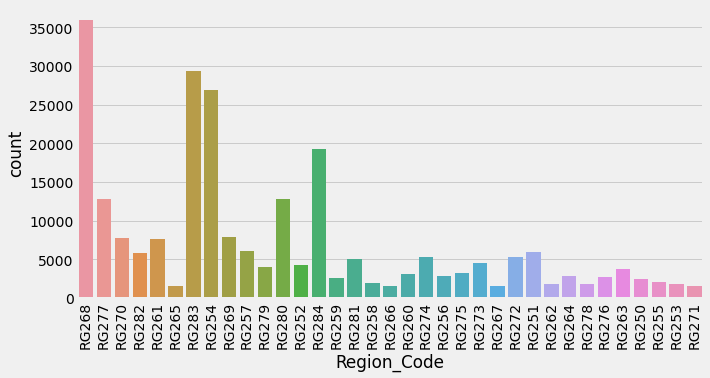

In [13]:
#Region code
plt.style.use('fivethirtyeight')
import seaborn as sns
plt.figure(figsize=(10,5))
chart=sns.countplot(x ='Region_Code', data = df) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='Occupation', ylabel='count'>

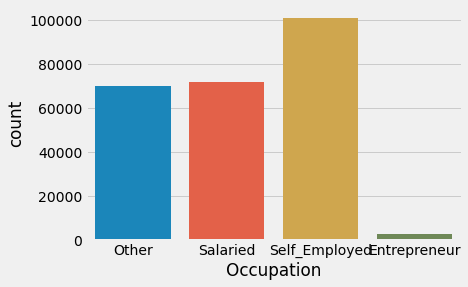

In [14]:
#occupation
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

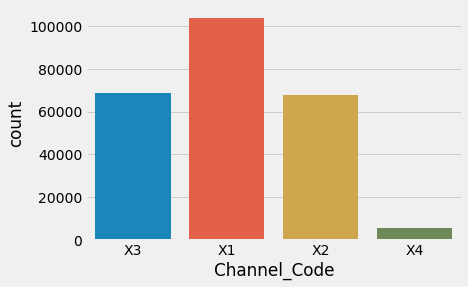

In [15]:
#channel code
sns.countplot(df['Channel_Code'])

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

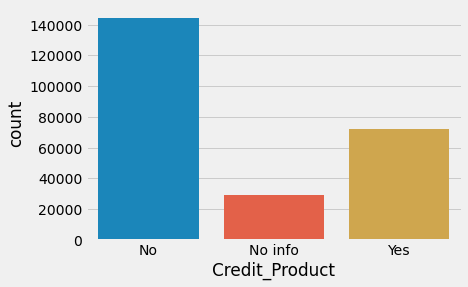

In [16]:
# credit product
sns.countplot(df['Credit_Product'])

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

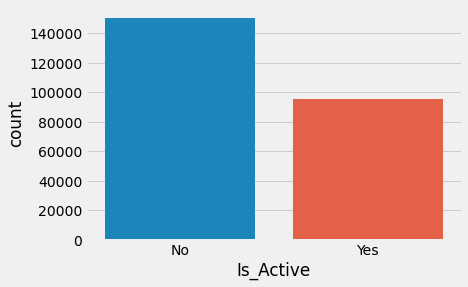

In [17]:
#is active
sns.countplot(df['Is_Active'])

# Visualizing Numerical Column

'\nBest interest for cedit card found in young generation aged between 20-30 ,because likely they are aware of the benifits like \nEveryday Purchases Rewards,Cash Back,Premium Travel Rewards\nand moderate interest for the people age between 45-60 ,Entrepreneurs\n'

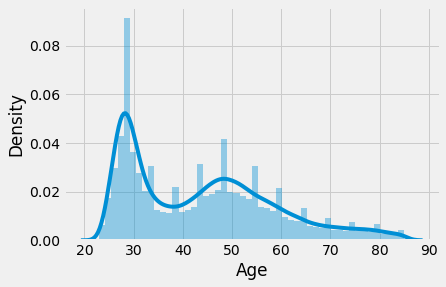

In [18]:
#Age
sns.distplot(df['Age'])
'''
Best interest for cedit card found in young generation aged between 20-30 ,because likely they are aware of the benifits like 
Everyday Purchases Rewards,Cash Back,Premium Travel Rewards
and moderate interest for the people age between 45-60 ,Entrepreneurs
'''

<AxesSubplot:>

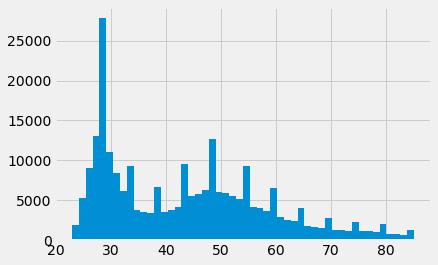

In [19]:
df['Age'].hist(bins=50)

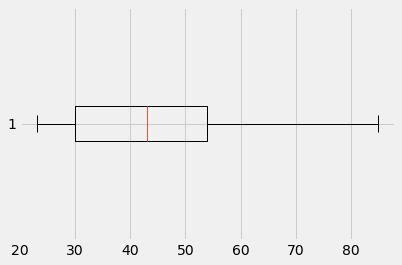

In [20]:
data1=df.iloc[:,7]

plt.boxplot(df.Age,0,'rs',0);

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

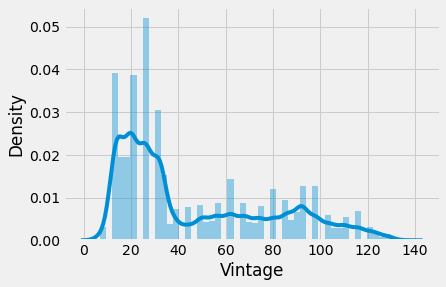

In [21]:
#Vintage
sns.distplot(df['Vintage'])


<AxesSubplot:>

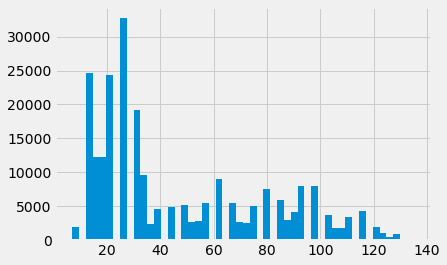

In [22]:
df['Vintage'].hist(bins=50)

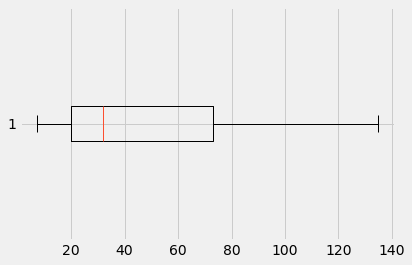

In [23]:
dat21=df.iloc[:,7]

plt.boxplot(df.Vintage,0,'rs',0);

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

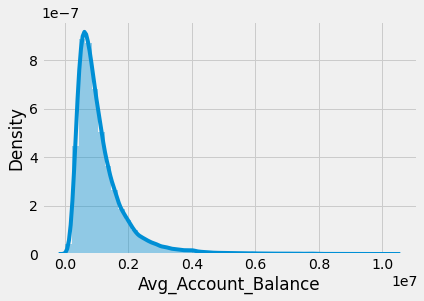

In [24]:
#Avg Account Balance
sns.distplot(df['Avg_Account_Balance'])

<AxesSubplot:>

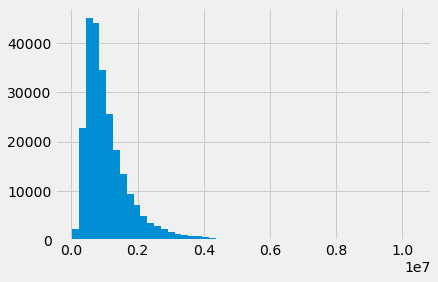

In [25]:
df['Avg_Account_Balance'].hist(bins=50)

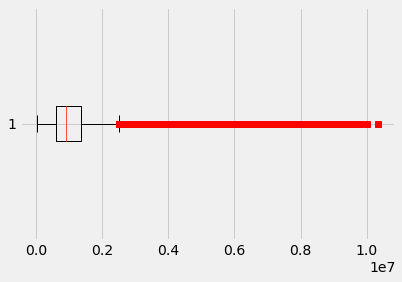

In [26]:
data3=df.iloc[:,7]

plt.boxplot(df.Avg_Account_Balance,0,'rs',0);

In [27]:
#________outliers
Q1 = np.percentile(df.Avg_Account_Balance, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.Avg_Account_Balance, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.Avg_Account_Balance, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)

Q1 25 percentile of the given data is,  604310.0
Q1 50 percentile of the given data is,  894601.0
Q1 75 percentile of the given data is,  1366666.0
Interquartile range is 762356.0
low_limit is -539224.0
up_limit is 2510200.0


In [28]:
# anything q3 + 1.5*iqr is outlier on higher side
#_______counting outliers
len(df.Avg_Account_Balance[df.Avg_Account_Balance >2510200 ])

14612

In [29]:
14612/245725

0.05946484891647166

In [30]:
df['log_Avg_Account_Balance'] = np.log2(df['Avg_Account_Balance'])

In [31]:
#df['log_Avg_Account_Balance'] = df['log_Avg_Account_Balance'].astype(int) 

In [32]:
#________outliers
Q1 = np.percentile(df.log_Avg_Account_Balance, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.log_Avg_Account_Balance, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.log_Avg_Account_Balance, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)

Q1 25 percentile of the given data is,  19.20492929009849
Q1 50 percentile of the given data is,  19.770884845448936
Q1 75 percentile of the given data is,  20.38222927457989
Interquartile range is 1.1772999844813974
low_limit is 17.438979313376393
up_limit is 22.148179251301983


In [33]:
# anything q3 + 1.5*iqr is outlier on higher side
#_______counting outliers
len(df.log_Avg_Account_Balance[df.log_Avg_Account_Balance >21 ])

23059

In [34]:
3062/245725       #1.2% outliers can be removed 

0.012461084545732018

In [35]:
# ____________let's remove outliers( by creating new df for required range)
df1 = df[df.log_Avg_Account_Balance <= 23] 
df1.info() #242663 ; 
245725-3062 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 245605 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       245605 non-null  object 
 1   Gender                   245605 non-null  object 
 2   Age                      245605 non-null  int64  
 3   Region_Code              245605 non-null  object 
 4   Occupation               245605 non-null  object 
 5   Channel_Code             245605 non-null  object 
 6   Vintage                  245605 non-null  int64  
 7   Credit_Product           245605 non-null  object 
 8   Avg_Account_Balance      245605 non-null  int64  
 9   Is_Active                245605 non-null  object 
 10  Is_Lead                  245605 non-null  int64  
 11  log_Avg_Account_Balance  245605 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 24.4+ MB


242663

'Log transformations\xa0are often recommended for skewed data, \nsuch as monetary measures or certain biological and demographic measures.\nLog transforming\xa0data usually has the effect of spreading out clumps of data\nand bringing together spread-out data.\n'

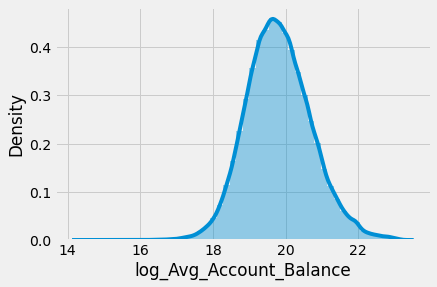

In [36]:
#Avg Account Balance
sns.distplot(df['log_Avg_Account_Balance'])

'''Log transformations are often recommended for skewed data, 
such as monetary measures or certain biological and demographic measures.
Log transforming data usually has the effect of spreading out clumps of data
and bringing together spread-out data.
'''

# Exploratory Data Analysis Part 2

In [37]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'log_Avg_Account_Balance'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

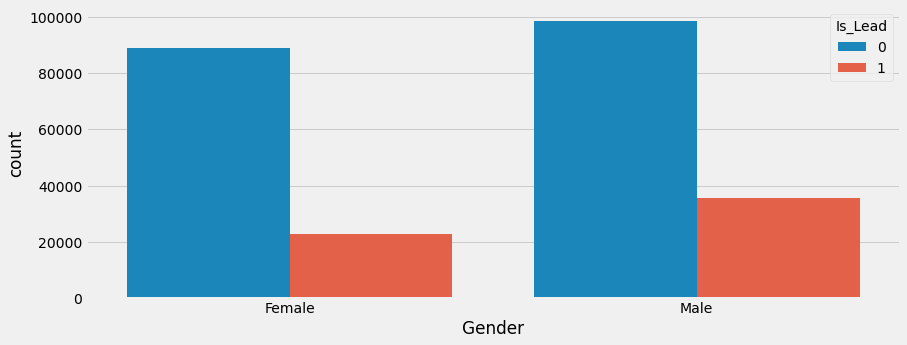

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(x='Gender',hue='Is_Lead',data= df)


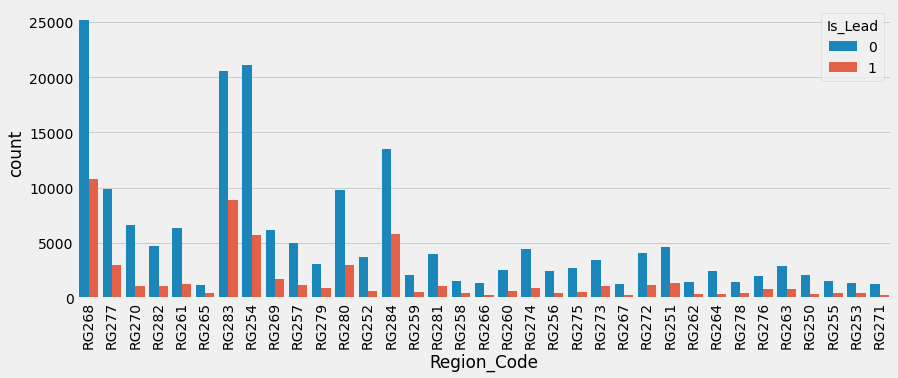

In [39]:
plt.figure(figsize=(13,5))
a=sns.countplot(x='Region_Code',hue='Is_Lead',data= df)
a.set_xticklabels(chart.get_xticklabels(),rotation=90);
#customers from region code RG268,RG283,RG254,RG284 are likely to be informed about the services provided by the bank.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

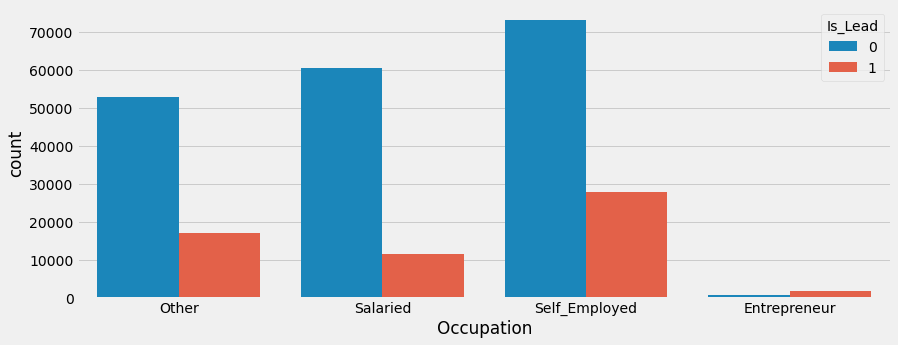

In [40]:
plt.figure(figsize=(13,5))
sns.countplot(x='Occupation',hue='Is_Lead',data= df)
#Here it is visible that self employed customers are more likely interested in having credit cards followed by salaried and others


<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

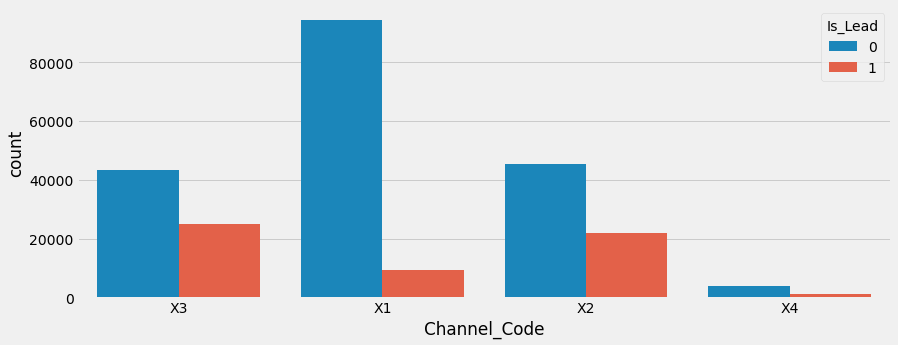

In [41]:
plt.figure(figsize=(13,5))
sns.countplot(x='Channel_Code',hue='Is_Lead',data= df)  
#channel X1,X4 are not attracting much customers,so investment in these channels may not give much results.

'Bank should focus specially in the area of Credit Product\nsince their were some missing information that yet to filled.\nThe risk of default is lower for the  Customers who have done  enough on-time payments .'

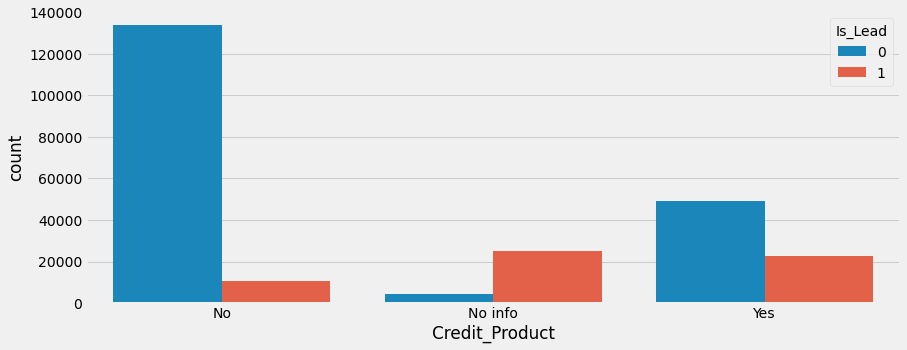

In [42]:
plt.figure(figsize=(13,5))
sns.countplot(x='Credit_Product',hue='Is_Lead',data= df)
'''Bank should focus specially in the area of Credit Product
since their were some missing information that yet to filled.
The risk of default is lower for the  Customers who have done  enough on-time payments .'''

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

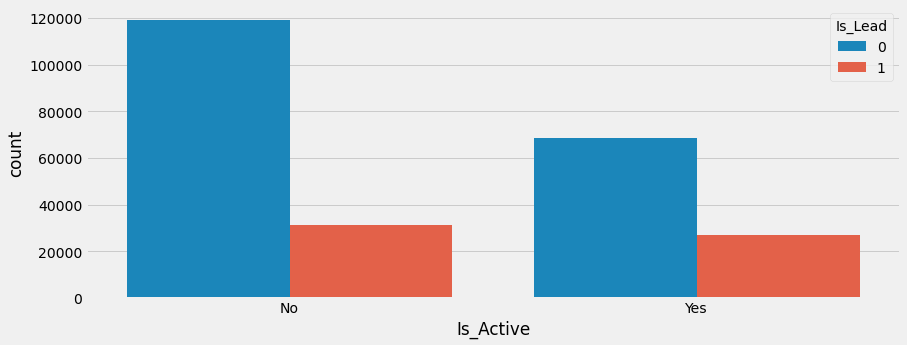

In [43]:
plt.figure(figsize=(13,5))
sns.countplot(x='Is_Active',hue='Is_Lead',data= df)


<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

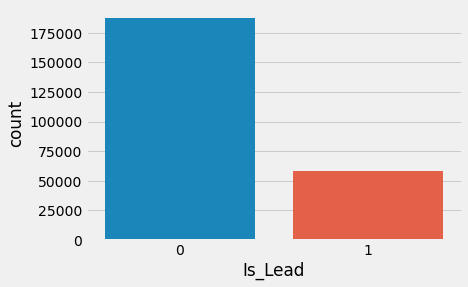

In [44]:
sns.countplot(df['Is_Lead'])

In [45]:
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [46]:
18743700/df.shape[0] #we need to apply SMOTE 

76.27917387323227

# Coorelation Matrix

<AxesSubplot:>

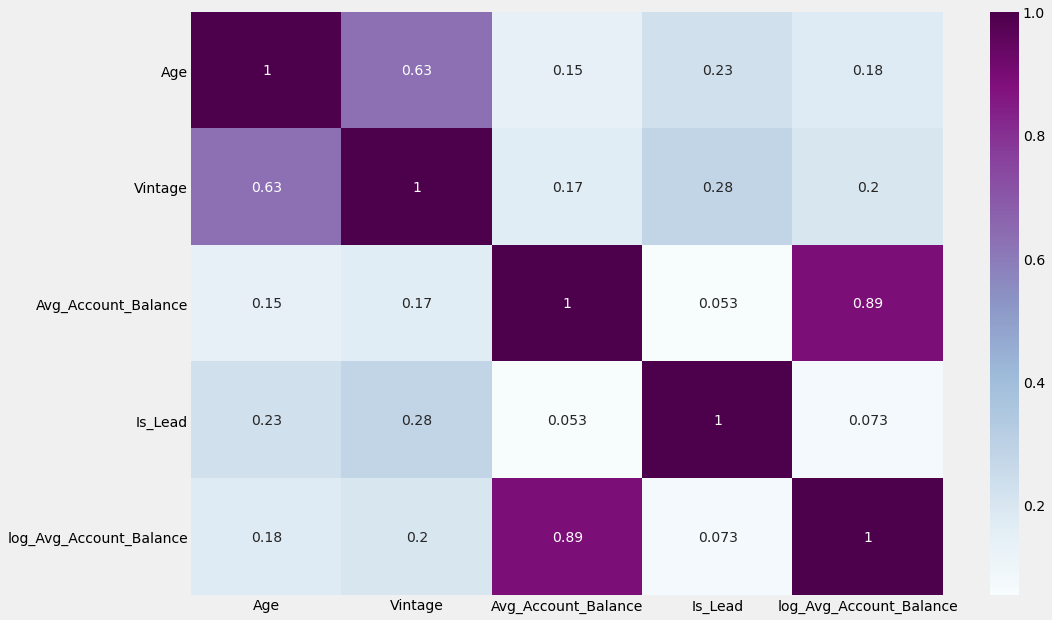

In [47]:
''''Highest correlation is between vintage and age , 
 According to the dataset “Vintage” is the age of an item
 as it relates to the Months it was created .
Explaining with they've been issued MBS( that have been seasoned)
long enough ,and  enough on-time payments have been made, that lowers the risk of default'''
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [48]:
df_backup = df.copy()
df =df_backup.copy()

In [49]:
test_df=pd.read_csv('D:/Desktop/test_mSzZ8RL.csv')

In [50]:
test_df.shape

(105312, 10)

In [51]:
#final_df=pd.concat([df,test_df],axis=0)

In [52]:
df.shape

(245725, 12)

In [53]:
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,log_Avg_Account_Balance
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,19.996032
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,19.150630
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,20.501366
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,18.843694
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,19.758228
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0,19.053679
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No info,1056750,Yes,1,20.011203
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0,18.762551
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0,20.281255
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,20.941803


# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
cols = ["ID","Gender","Region_Code","Credit_Product","Occupation","Channel_Code","Is_Active"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [55]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,log_Avg_Account_Balance
0,179194,0,73,18,1,2,43,0,1045696,0,0,19.996032
1,131013,0,30,27,2,0,32,0,581988,0,0,19.150630
2,121520,0,56,18,3,2,26,0,1484315,1,0,20.501366
3,57273,1,34,20,2,0,19,0,470454,0,0,18.843694
4,209602,0,30,32,2,0,33,0,886787,0,0,19.758228


In [56]:
df.shape

(245725, 12)

# Feature Scaling

In [57]:
scaling_feature=[feature for feature in df.columns if feature not in ['Is_Lead'] ]
len(scaling_feature)

11

In [58]:
scaling_feature

['ID',
 'Gender',
 'Age',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'log_Avg_Account_Balance']

In [59]:
#Standarise the values of the variables to the same range
feature_scale=[feature for feature in df.columns if feature not in ['Is_Lead']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[feature_scale] =scaler.fit_transform(df[feature_scale])    

In [60]:
df = pd.DataFrame(df)
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,log_Avg_Account_Balance
0,0.729249,0.0,0.806452,0.529412,0.333333,0.666667,0.281250,0.0,0.099205,0.0,0,0.630865
1,0.533171,0.0,0.112903,0.794118,0.666667,0.000000,0.195312,0.0,0.054321,0.0,0,0.536510
2,0.494539,0.0,0.532258,0.529412,1.000000,0.666667,0.148438,0.0,0.141660,1.0,0,0.687265
3,0.233079,1.0,0.177419,0.588235,0.666667,0.000000,0.093750,0.0,0.043525,0.0,0,0.502253
4,0.852998,0.0,0.112903,0.941176,0.666667,0.000000,0.203125,0.0,0.083823,0.0,0,0.604324
5,0.186241,1.0,0.532258,0.323529,1.000000,0.000000,0.195312,0.0,0.050659,1.0,0,0.525690
6,0.386454,1.0,0.629032,0.941176,0.333333,0.666667,0.101562,0.5,0.100275,1.0,1,0.632558
7,0.569134,0.0,0.403226,0.441176,1.000000,0.666667,0.046875,0.0,0.041034,1.0,0,0.493197
8,0.990261,0.0,0.274194,0.970588,1.000000,0.333333,0.242188,0.0,0.121331,0.0,0,0.662699
9,0.740139,0.0,0.516129,0.529412,1.000000,0.333333,0.328125,1.0,0.192954,0.0,0,0.736422


In [61]:
main_df=df.copy()

In [62]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product             0
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
log_Avg_Account_Balance    0
dtype: int64

# Combine Test Data

In [63]:
# specify input and output attributes
X = df.drop(columns=['Is_Lead','Avg_Account_Balance'], axis=1)

y = df['Is_Lead']

In [64]:
#test_df=pd.read_csv('test_mSzZ8RL.csv')

In [65]:
test_df2=pd.read_csv('D:/Desktop/test_mSzZ8RL.csv')

In [66]:
test_df.shape

(105312, 10)

In [67]:
test_df["Credit_Product"].fillna("No info", inplace = True)
test_df['log_Avg_Account_Balance'] = np.log2(test_df['Avg_Account_Balance'])
test_df.drop('Avg_Account_Balance',axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
cols = ["ID","Gender","Region_Code","Credit_Product","Occupation","Channel_Code","Is_Active"]
le = LabelEncoder()
for col in cols:
    test_df[col] = le.fit_transform(test_df[col])

scaling_feature=[feature for feature in test_df.columns if feature not in ['Is_Lead'] ]
len(scaling_feature)
#Standarise the values of the variables to the same range
feature_scale=[feature for feature in test_df.columns if feature not in ['Is_Lead']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test_df[feature_scale] =scaler.fit_transform(test_df[feature_scale]) 
test_df = pd.DataFrame(test_df)
test_df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,log_Avg_Account_Balance
0,0.894807,1.0,0.081967,0.117647,0.333333,0.000000,0.140625,1.0,0.0,0.574028
1,0.272972,1.0,0.311475,0.529412,0.333333,0.333333,0.328125,0.5,0.0,0.610280
2,0.900979,1.0,0.114754,0.588235,0.666667,0.000000,0.054688,0.0,0.0,0.371049
3,0.863547,1.0,0.081967,0.647059,0.333333,0.000000,0.203125,0.0,0.0,0.599743
4,0.833750,0.0,0.081967,0.588235,0.333333,0.000000,0.093750,0.0,0.0,0.553969
5,0.702481,1.0,0.590164,0.529412,1.000000,0.666667,0.804688,0.0,0.0,0.874722
6,0.958475,0.0,0.737705,0.088235,0.333333,0.333333,0.468750,0.0,0.0,0.628300
7,0.039132,0.0,0.098361,0.205882,0.666667,0.000000,0.203125,0.0,0.0,0.593753
8,0.909183,1.0,0.311475,1.000000,0.666667,0.666667,0.578125,0.5,1.0,0.623202
9,0.168074,0.0,0.491803,0.970588,1.000000,0.333333,0.234375,1.0,0.0,0.707088


In [68]:
#final_df.shape

In [69]:
#final_df.head(100)

# Train-Test Split

In [70]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X
X_test = test_df
y_train = y
#y_test 

# Model Training

In [71]:
from imblearn.over_sampling import SMOTE
#!pip install imbalanced-learn==0.7.0

os = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Is_Lead'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Lost Bid in oversampled data",len(os_data_y[os_data_y['Is_Lead']==0]))
print("Number of Won Bid",len(os_data_y[os_data_y['Is_Lead']==1]))
print("Proportion of not interested clients in oversampled data is ",len(os_data_y[os_data_y['Is_Lead']==0])/len(os_data_X))
print("Proportion of interested clients in oversampled data is ",len(os_data_y[os_data_y['Is_Lead']==1])/len(os_data_X))


length of oversampled data is  374874
Number of Lost Bid in oversampled data 187437
Number of Won Bid 187437
Proportion of not interested clients in oversampled data is  0.5
Proportion of interested clients in oversampled data is  0.5


In [72]:
# classify function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)


Accuracy is 76.23239914267886
Cross validation is 76.32882287109572


In [74]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 78.28345858542012
Cross validation is 78.23054227286602


In [75]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 85.58289698581079
Cross validation is 85.69294943534439


In [76]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 85.27767980683144
Cross validation is 85.39424153016583


In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred=pd.DataFrame(y_pred,columns=['Is_Lead'])
y_pred.shape

(105312, 1)

In [79]:
#final_df2 = pd.concat([test_df2,y_pred])
test_df2['Is_Lead'] = y_pred


In [80]:
final_df = test_df2[['ID','Is_Lead']]

In [81]:
final_df

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [82]:
final_df.to_csv('submission.csv',index= False)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [ ]:
confusion_matrix(y_true=y_test, y_pred=preds)

# Hyperparameter tuning

In [83]:

model = RandomForestClassifier(n_estimators=150, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)


Accuracy is 82.29604709840201
Cross validation is 81.88422016481839


# Confusion Matrix

In [84]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
from sklearn.metrics import confusion_matrix
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y, y_pred)
cm

ValueError: Found input variables with inconsistent numbers of samples: [245725, 105312]

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
sns.heatmap(cm, annot=True)